In [1]:
import glob
import os
import librosa
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [17]:
X=np.load('X.npy')
y=np.load('y.npy')

train_x, rest_x, train_y, rest_y = train_test_split(X, y, test_size=0.33,random_state=42)
test_x, val_x, test_y, val_y = train_test_split(rest_x,rest_y,test_size=0.5,random_state=42)

In [11]:

#dnn parameters
n_dim = train_x.shape[1]
n_classes = train_y.shape[1]
n_hidden_units_1 = n_dim
n_hidden_units_2 = 400 # approx n_dim * 2
n_hidden_units_3 = 200 # half of layer 2
n_hidden_units_4 = 100

#defining the model
def create_model(activation_function='relu', init_type='normal', optimiser='adam', dropout_rate=0.8):
    model = Sequential()
    # layer 1
    model.add(Dense(n_hidden_units_1, input_dim=n_dim, init=init_type, activation=activation_function))
    # layer 2
    model.add(Dense(n_hidden_units_2, init=init_type, activation=activation_function))
    model.add(Dropout(dropout_rate))
    # layer 3
    model.add(Dense(n_hidden_units_3, init=init_type, activation=activation_function))
    model.add(Dropout(dropout_rate))
    #layer4
    model.add(Dense(n_hidden_units_4, init=init_type, activation=activation_function))
    model.add(Dropout(dropout_rate))
    # output layer  n_classes
    model.add(Dense(n_classes, init=init_type, activation='sigmoid'))
    #model compilation
    model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
    return model


#create the model
model = create_model()
#train the model\\142
history = model.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=200, batch_size=32)




C:\Users\mandosaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(193, input_dim=193, activation="relu", kernel_initializer="normal")`
  del sys.path[0]
C:\Users\mandosaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="relu", kernel_initializer="normal")`
  from ipykernel import kernelapp as app
C:\Users\mandosaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", kernel_initializer="normal")`
C:\Users\mandosaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="normal")`
C:\Users\mandosaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="sigmo

Train on 804 samples, validate on 198 samples
Epoch 1/200
804/804 [==============================] - 0s 615us/step - loss: 2.1353 - accuracy: 0.6213 - val_loss: 0.4360 - val_accuracy: 0.7500
Epoch 2/200
804/804 [==============================] - 0s 160us/step - loss: 0.6907 - accuracy: 0.7096 - val_loss: 0.4502 - val_accuracy: 0.7601
Epoch 3/200
804/804 [==============================] - 0s 165us/step - loss: 0.5078 - accuracy: 0.7550 - val_loss: 0.4504 - val_accuracy: 0.8258
Epoch 4/200
804/804 [==============================] - 0s 170us/step - loss: 0.4434 - accuracy: 0.7649 - val_loss: 0.4470 - val_accuracy: 0.7475
Epoch 5/200
804/804 [==============================] - 0s 166us/step - loss: 0.4505 - accuracy: 0.7593 - val_loss: 0.4315 - val_accuracy: 0.8258
Epoch 6/200
804/804 [==============================] - 0s 168us/step - loss: 0.4372 - accuracy: 0.7581 - val_loss: 0.4036 - val_accuracy: 0.7803
Epoch 7/200
804/804 [==============================] - 0s 175us/step - loss: 0.4342 

Epoch 57/200
804/804 [==============================] - 0s 148us/step - loss: 0.0886 - accuracy: 0.9714 - val_loss: 0.1072 - val_accuracy: 0.9672
Epoch 58/200
804/804 [==============================] - 0s 147us/step - loss: 0.0849 - accuracy: 0.9652 - val_loss: 0.1091 - val_accuracy: 0.9646
Epoch 59/200
804/804 [==============================] - 0s 140us/step - loss: 0.0894 - accuracy: 0.9689 - val_loss: 0.1223 - val_accuracy: 0.9697
Epoch 60/200
804/804 [==============================] - 0s 154us/step - loss: 0.0743 - accuracy: 0.9726 - val_loss: 0.1125 - val_accuracy: 0.9646
Epoch 61/200
804/804 [==============================] - 0s 160us/step - loss: 0.0763 - accuracy: 0.9720 - val_loss: 0.1220 - val_accuracy: 0.9747
Epoch 62/200
804/804 [==============================] - 0s 153us/step - loss: 0.0864 - accuracy: 0.9701 - val_loss: 0.1285 - val_accuracy: 0.9596
Epoch 63/200
804/804 [==============================] - 0s 154us/step - loss: 0.0795 - accuracy: 0.9701 - val_loss: 0.1149 -

804/804 [==============================] - 0s 159us/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.1648 - val_accuracy: 0.9722
Epoch 114/200
804/804 [==============================] - 0s 148us/step - loss: 0.0241 - accuracy: 0.9932 - val_loss: 0.1909 - val_accuracy: 0.9672
Epoch 115/200
804/804 [==============================] - 0s 151us/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.2483 - val_accuracy: 0.9621
Epoch 116/200
804/804 [==============================] - 0s 146us/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.2436 - val_accuracy: 0.9520
Epoch 117/200
804/804 [==============================] - 0s 157us/step - loss: 0.0475 - accuracy: 0.9882 - val_loss: 0.2034 - val_accuracy: 0.9697
Epoch 118/200
804/804 [==============================] - 0s 146us/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.3025 - val_accuracy: 0.9520
Epoch 119/200
804/804 [==============================] - 0s 151us/step - loss: 0.0259 - accuracy: 0.9925 - val_loss: 0.1883 - val_ac

Epoch 169/200
804/804 [==============================] - 0s 168us/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.4404 - val_accuracy: 0.9747
Epoch 170/200
804/804 [==============================] - 0s 147us/step - loss: 0.0265 - accuracy: 0.9950 - val_loss: 0.5570 - val_accuracy: 0.9545
Epoch 171/200
804/804 [==============================] - 0s 155us/step - loss: 0.0444 - accuracy: 0.9900 - val_loss: 0.4198 - val_accuracy: 0.9495
Epoch 172/200
804/804 [==============================] - 0s 177us/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.3328 - val_accuracy: 0.9697
Epoch 173/200
804/804 [==============================] - 0s 155us/step - loss: 0.0135 - accuracy: 0.9938 - val_loss: 0.3170 - val_accuracy: 0.9722
Epoch 174/200
804/804 [==============================] - 0s 166us/step - loss: 0.0104 - accuracy: 0.9981 - val_loss: 0.3366 - val_accuracy: 0.9747
Epoch 175/200
804/804 [==============================] - 0s 162us/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0

In [7]:
model.summary();

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 193)               37442     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               77600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

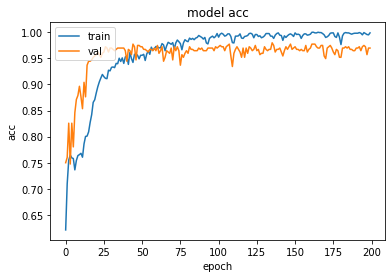

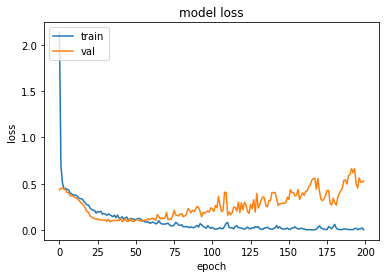

198/198 [==============================] - 0s 55us/step
Accuracy =  96.71717286109924 %  Loss =  67.69823907675993 %


In [12]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# In[49]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# In[53]:


eva = model.evaluate(test_x,test_y)
print("Accuracy = ",eva[1]*100,"%  Loss = ",eva[0]*100,'%')

In [13]:

#predicting from the model
predict=model.predict(test_x,batch_size=32)


# In[19]:


emotions=['sad', 'happy']
#predicted emotions from the test set
y_pred=[]
for i in range(0,test_y.shape[0]):
    if predict[i][0]>0.5:
        y_pred.append(1)
    else :
        y_pred.append(0)
predicted_emo=[]
for i in range(0,test_y.shape[0]):
  emo=emotions[y_pred[i]]
  predicted_emo.append(emo)


# In[20]:


actual_emo=[]
y_true=test_y[:,0]
for i in range(0,test_y.shape[0]):
    emo=emotions[int(y_true[i])]
    actual_emo.append(emo)


In [16]:


# In[21]:
ii=0
cnt=0
for q in actual_emo :
    if actual_emo[ii]!=predicted_emo[ii]:
        cnt+=1
    print("Real : ",actual_emo[ii],"  Pred.: ",predicted_emo[ii])
    ii+=1

print("Correct = ",len(actual_emo)-cnt,"Wrong = ",cnt)

Real :  happy   Pred.:  happy
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  sad   Pred.:  sad
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  happy   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  sad   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  happy   Pred.:  happy
Real :  happy   Pred.:  happy
Real :  happy   Pred.:  sad
Real :  happy   Pred.:  happy
Real :  sad   Pred.:  sad
Real :  sad   Pred.:  sad
Real :  sad   Pred.:  sad
Real :  happy   Pr